In [1]:
from fastai.tabular import *
import os
from sklearn import preprocessing


In [2]:
path = Path('/Users/bbabu/fastai/DataSamples')

In [3]:
# df = pd.read_csv(path/'Output-5v2.csv', sep=',', header=0)

# df_test = pd.read_csv(path/'Output-6-Test.csv', sep=',', header=0)

#changed on 7th Oct
df = pd.read_csv(path/'Output-5v5.csv', sep=',', header=0)
df_test = pd.read_csv(path/'Output-5v5-Test.csv', sep=',', header=0)

In [4]:
# ?? df
df.dtypes

GroupDN          object
Member           object
Manager          object
BusinessGroup    object
Platform         object
Title            object
Description      object
Department       object
Country          object
City             object
Owner            object
dtype: object

In [5]:
df.drop(['Description', 'Platform', 'BusinessGroup', 'Country'], axis=1, inplace=True)
df_test.drop(['Description', 'Platform', 'BusinessGroup', 'Country'], axis=1, inplace=True)



In [6]:
# df.set_index('GroupDN', inplace=True)
# df_test.set_index('GroupDN', inplace=True)

In [7]:
# df = df.groupby(by='GroupDN', as_index=False)
# df_test = df_test.groupby(by='GroupDN', as_index=False)

In [8]:
df.dtypes

GroupDN       object
Member        object
Manager       object
Title         object
Department    object
City          object
Owner         object
dtype: object

In [9]:
# ?? df.apply

In [10]:
df.head()

,GroupDN,Member,Manager,Title,Department,City,Owner
0,"CN=GTM GLOBAL USER,OU=UP Managed Groups,DC=Na,...",m603532,No,Senior Financial Planning and Analysis Analyst,FIBI Accounting & Finance,MECHELEN,No
1,"CN=GTM GLOBAL USER,OU=UP Managed Groups,DC=Na,...",j952466,No,Marketing & Sales Analyst,FIBI GTM Marketing,WAYZATA,No
2,"CN=GTM GLOBAL USER,OU=UP Managed Groups,DC=Na,...",a260306,No,Marketing & Sales FP&A Analyst,NaN,MECHELEN,No
3,"CN=GTM GLOBAL USER,OU=UP Managed Groups,DC=Na,...",gbuts,No,Corporate Function,SO - D&BI,Mechelen,No
4,"CN=GTM GLOBAL USER,OU=UP Managed Groups,DC=Na,...",fschrove,No,Business Analyst,GIT Value Enablers D&BI,MECHELEN,Yes


In [11]:
# le = preprocessing.LabelEncoder()
# categorical = list(df.select_dtypes(include=['object']).columns.values)
# for cat in categorical:
#     #print(cat)
#     df[cat].fillna('N/A', inplace=True)
#     df[cat] = le.fit_transform(df[cat].astype(str))

# categorical = list(df_test.select_dtypes(include=['object']).columns.values)
# for cat in categorical:
#     #print(cat)
#     df_test[cat].fillna('N/A', inplace=True)
#     df_test[cat] = le.fit_transform(df_test[cat].astype(str))



In [12]:
# dep_var = 'Owner'
# cont_names = ['GroupDN', 'Member', 'Manager', 'BusinessGroup', 'Platform', 'Title', 'Description', 'Department', 'Country', 'City']
# cat_names = []
# valid_idx = range(len(df)-1000, len(df))
# procs = [FillMissing, Categorify, Normalize]



In [13]:
# data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
#         #.split_by_idx(list(range(1,1000)))
#         .split_by_idx(valid_idx)
#         .label_from_df(cols=dep_var)
#         .add_test(TabularList.from_df(df_test, cat_names=cat_names, cont_names=cont_names, procs=procs))
#         .databunch())

In [14]:
dep_var = 'Owner'
#cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Title', 'Description', 'Department', 'Country', 'State', 'City']
# cat_names = ['GroupDN', 'MemberDN', 'Member', 'Manager', 'BusinessGroup', 'Platform', 'Title', 'Description', 'Department', 'Country', 'State', 'City']
# cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Title', 'Description', 'Department', 'Country', 'City']
# cat_names = ['GroupDN', 'Member', 'Manager', 'BusinessGroup', 'Platform', 'Title', 'Department', 'Country', 'City']
cat_names = [ 'Member', 'Manager', 'Title', 'Department', 'City']


#cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Title', 'Department', 'Country', 'City']
#cat_names = ['GroupDN', 'Member', 'BusinessGroup', 'Platform', 'Country', 'City']
# cont_names = ['Manager']
cont_names = []
#txt_cols = ['Description']

valid_idx = range(len(df)-1000, len(df))
#print(valid_idx)

procs = [FillMissing, Categorify, Normalize]

In [15]:
#??TabularDataBunch.from_df

In [16]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
        #.split_by_idx(list(range(1,1000)))
        .split_by_idx(valid_idx)
        .label_from_df(cols=dep_var)
        .add_test(TabularList.from_df(df_test, cat_names=cat_names, cont_names=cont_names, procs=procs))
        .databunch())

In [17]:
#data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names, cont_names=cont_names)

In [18]:
data.classes

['No', 'Yes']

In [19]:
#learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
#learn = tabular_learner(data, layers=[1000,500], metrics=dice)
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [20]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(163, 28)
    (1): Embedding(3, 3)
    (2): Embedding(130, 24)
    (3): Embedding(70, 17)
    (4): Embedding(62, 16)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=88, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


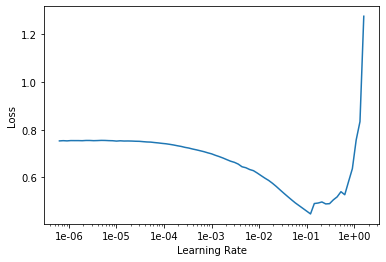

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
#learn.fit(5, 1e-02)
# wd = 0.2

In [23]:
# lr = slice(1e-06,1e-01)

In [24]:
learn.fit_one_cycle(10, 1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,0.728146,0.612836,0.973000,00:00
1,0.728539,0.578682,0.973000,00:00
2,0.686630,0.266139,0.973000,00:00
3,0.611346,0.128694,0.973000,00:00
4,0.490439,0.183971,0.973000,00:00
5,0.405535,0.304167,0.972000,00:00
6,0.370097,0.407856,0.971000,00:00
7,0.319211,0.459811,0.971000,00:00
8,0.277758,0.458568,0.971000,00:00
9,0.244714,0.437172,0.971000,00:00


In [25]:
row = df.iloc[6]
learn.predict(row)

(Category Yes, tensor(1), tensor([1.1650e-09, 1.0000e+00]))

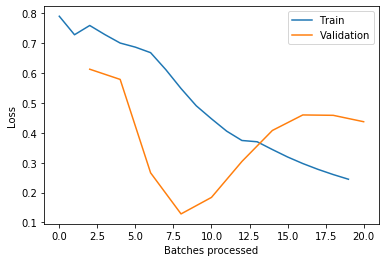

In [26]:
learn.recorder.plot_losses()

[('Yes', 'No', 26), ('No', 'Yes', 3)]

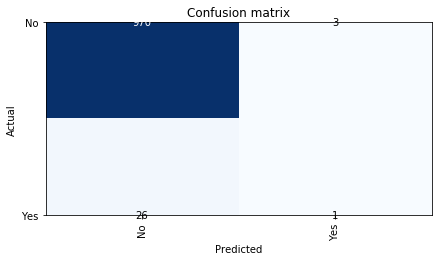

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused()

In [28]:
learn.export()

In [29]:
#??learn.get_preds
#??tabular_learner

In [30]:
preds = learn.get_preds(ds_type=DatasetType.Test)[1].numpy()
#preds = learn.get_preds(ds_type=DatasetType.Valid)[1].numpy()

In [31]:
print(preds)
preds.sum()

[0 0 0 0 ... 0 0 0 0]


0

In [32]:
final_df = pd.DataFrame({'GroupDN': df_test['GroupDN'],'Member': df_test['Member'], 'Manager': df_test['Manager'], 'Owner': preds})
final_df.to_csv(path/'MLProcessed-Fastai.csv', header=True, index=False)

In [33]:
#learn.show_results()